# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [106]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins

df_penguins = load_penguins()

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [108]:
df_penguins = df_penguins.dropna()

X = df_penguins.drop("bill_depth_mm", axis=1)
y = df_penguins[["bill_depth_mm"]]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [109]:
# Pipeline 1

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  remainder = "drop"
)

pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline1_fit = pipeline_1.fit(X_train, y_train)
test_pred = pipeline_1.predict(X_test)
train_pred = pipeline_1.predict(X_train)

In [110]:
mse_test_1 = mean_squared_error(test_pred, y_test)
mse_train_1 = mean_squared_error(train_pred, y_train)

In [111]:
errors = []
errors.append({
    "Flexibility": 1,
    "mse_train": mse_train_1,
    "mse_test": mse_test_1
})

In [112]:
# Pipeline 2

ct2 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "island"]),
    ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  remainder = "drop"
)

pipeline_2 = Pipeline(
  [("preprocessing", ct2),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline2_fit = pipeline_2.fit(X_train, y_train)
test_pred = pipeline_2.predict(X_test)
train_pred = pipeline_2.predict(X_train)

mse_test_2 = mean_squared_error(test_pred, y_test)
mse_train_2 = mean_squared_error(train_pred, y_train)

errors.append({
    "Flexibility": 3,
    "mse_train": mse_train_2,
    "mse_test": mse_test_2
})

In [113]:
# Pipeline 3

ct3 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "island", "species"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm"])
  ],
  remainder = "drop"
)

pipeline_3 = Pipeline(
  [("preprocessing", ct3),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline3_fit = pipeline_3.fit(X_train, y_train)
test_pred = pipeline_3.predict(X_test)
train_pred = pipeline_3.predict(X_train)

mse_test_3 = mean_squared_error(test_pred, y_test)
mse_train_3 = mean_squared_error(train_pred, y_train)

errors.append({
    "Flexibility": 5,
    "mse_train": mse_train_3,
    "mse_test": mse_test_3
})

In [114]:
# Pipeline 4

ct4 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "island", "species"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "body_mass_g", "flipper_length_mm"])
  ],
  remainder = "drop"
)

pipeline_4 = Pipeline(
  [("preprocessing", ct4),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline4_fit = pipeline_4.fit(X_train, y_train)
test_pred = pipeline_4.predict(X_test)
train_pred = pipeline_4.predict(X_train)

mse_test_4 = mean_squared_error(test_pred, y_test)
mse_train_4 = mean_squared_error(train_pred, y_train)

errors.append({
    "Flexibility": 6,
    "mse_train": mse_train_4,
    "mse_test": mse_test_4
})

In [115]:
df_errors = pd.DataFrame(errors)

,Flexibility,mse_train,mse_test
0,1,3.611647,3.821204
1,3,1.546673,1.630983
2,5,0.610317,0.710865
3,6,0.582753,0.708676


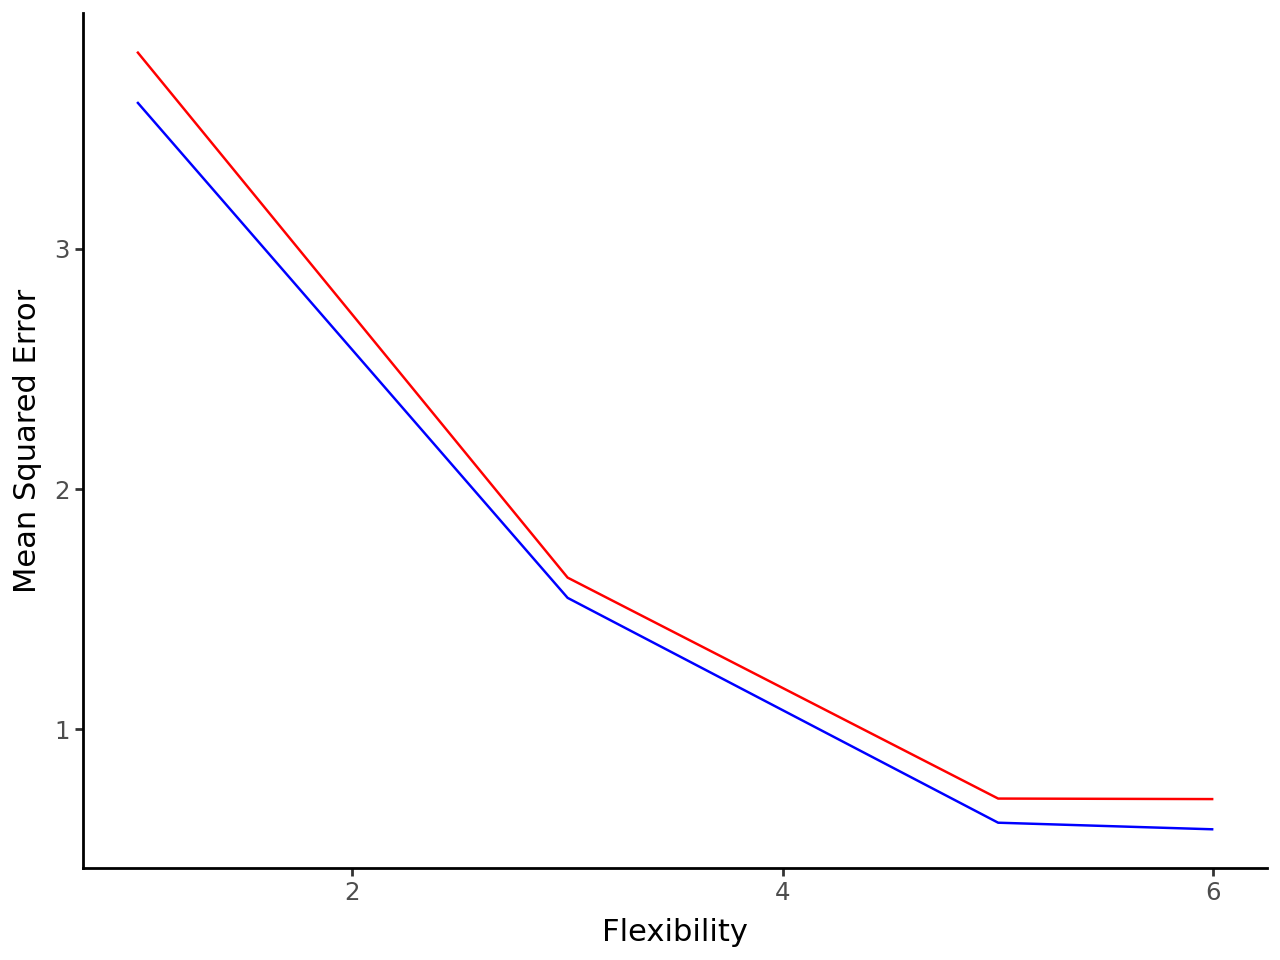

In [121]:
from plotnine import ggplot, aes, geom_line, labs, theme_classic

(ggplot(df_errors, aes(x="Flexibility", y="mse_train"))
+ geom_line(color="blue")
+ geom_line(aes(y="mse_test"), color="red")
+ labs(x="Flexibility", y="Mean Squared Error", title="")
+ theme_classic())

Out of these models, Model 3 and Model 4 have the lowest mean squared error so they are the best!